# 定休日の判定

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)


In [345]:
train = pd.read_pickle('train.pkl')
test = pd.read_pickle('test.pkl')
train.visit_date = pd.to_datetime(train.visit_date)
test.visit_date = pd.to_datetime(test.visit_date)

In [346]:
date_range = pd.DataFrame({
    'visit_date': pd.date_range(train.visit_date.min(), train.visit_date.max()),
})

In [347]:
ind = train.groupby('air_store_id').count().index

In [351]:
train[train.visit_date=='2016-01-13']

,air_store_id,visit_date,visitors,dow,year,month,day_of_week,holiday_flg,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,air_genre_name0,air_area_name0,air_genre_name1,air_area_name1,air_genre_name2,air_area_name2,air_genre_name3,air_area_name3,air_genre_name4,air_area_name4,air_genre_name5,air_area_name5,air_genre_name6,air_area_name6,air_genre_name7,air_area_name7,air_genre_name8,air_area_name8,air_genre_name9,air_area_name9,rs1_x,rv1_x,rs2_x,rv2_x,rs1_y,rv1_y,rs2_y,rv2_y,id,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2,air_store_id_target,air_genre_name_target,air_area_name_target
0,air_ba937bf13d40fb24,2016-01-13,3.258097,2,2016,1,6,0,2.079442,3.137813,3.258097,4.060443,64.0,4.0,62.0,35.658068,139.751599,4.0,7.0,7.0,6.0,0.0,26.0,0.0,6.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,air_ba937bf13d40fb24_2016-01-13,-1.0,-1.0,-1.0,20160113,8.362564,4.521799,175.409667,603,3.059685,2.654615,2.711715
398,air_25e9888d30b386df,2016-01-13,3.091042,2,2016,1,6,0,0.693147,1.783992,1.609438,3.367296,51.0,7.0,75.0,35.626568,139.725858,7.0,7.0,0.0,6.0,0.0,39.0,0.0,6.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,air_25e9888d30b386df_2016-01-13,-1.0,-1.0,-1.0,20160113,8.394064,4.547540,175.352426,106,1.743299,2.911129,2.257023
1725,air_fd6aac1043520e83,2016-01-13,3.713572,2,2016,1,6,0,2.302585,3.516235,3.650574,4.110874,66.0,7.0,62.0,35.658068,139.751599,7.0,7.0,0.0,6.0,0.0,26.0,0.0,6.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,air_fd6aac1043520e83_2016-01-13,-1.0,-1.0,-1.0,20160113,8.362564,4.521799,175.409667,819,3.394147,2.911129,2.711715
2105,air_64d4491ad8cdb1c6,2016-01-13,1.791759,2,2016,1,6,0,1.609438,2.712032,2.772589,4.025352,67.0,4.0,62.0,35.658068,139.751599,4.0,7.0,7.0,6.0,0.0,26.0,0.0,6.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,air_64d4491ad8cdb1c6_2016-01-13,-1.0,-1.0,-1.0,20160113,8.362564,4.521799,175.409667,312,2.636464,2.654615,2.711715
3752,air_ee3a01f0c71a769f,2016-01-13,2.944439,2,2016,1,6,0,1.609438,2.909563,2.944439,4.382027,61.0,2.0,37.0,34.710895,137.725940,2.0,6.0,6.0,5.0,0.0,9.0,0.0,7.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,air_ee3a01f0c71a769f_2016-01-13,-1.0,-1.0,-1.0,20160113,9.309736,6.547459,172.436835,773,3.209141,2.888893,2.892726
4139,air_9438d67241c81314,2016-01-13,3.218876,2,2016,1,6,0,1.791759,3.539593,3.583519,4.418841,67.0,6.0,0.0,33.589216,130.392813,6.0,0.0,2.0,5.0,0.0,7.0,0.0,7.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,air_9438d67241c81314_2016-01-13,-1.0,-1.0,-1.0,20160113,10.431416,13.880585,163.982029,475,3.464559,2.881236,2.779849
6002,air_d0e8a085d8dc83aa,2016-01-13,2.302585,2,2016,1,6,0,0.693147,2.215062,2.302585,3.091042,68.0,2.0,29.0,34.720228,135.265455,2.0,3.0,6.0,5.0,0.0,22.0,0.0,7.0,0.0,83.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,air_d0e8a085d8dc83aa_2016-01-13,-1.0,-1.0,-1.0,20160113,9.300404,9.007943,169.985683,685,2.300659,2.888893,2.983942
6476,air_5c65468938c07fa5,2016-01-13,2.833213,2,2016,1,6,0,0.693147,2.334108,2.302585,4.369448,41.0,11.0,74.0,35.661777,139.704051,11.0,7.0,0.0,6.0,0.0,38.0,0.0,6.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,air_5c65468938c07fa5_2016-01-13,-1.0,-1.0,-1.0,20160113,8.358855,4.569348,175.365828,272,2.797092,2.794704,2.826852
7244,air_9fc607777ad76b26,2016-01-13,1.791759,2,2016,1,6,0,1.098612,2.248548,2.302585,3.583519,57.0,11.0,58.0,35.641463,139.698171,11.0,7.0,0.0,6.0,0.0,25.0,0.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.000000,-1.

In [354]:
pd.merge(left=train[train.air_store_id==ind[0]], right=date_range, on='visit_date', how='outer').sort_values(by='visit_date').groupby('dow').max()

,air_store_id,visit_date,visitors,year,month,day_of_week,holiday_flg,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,air_genre_name0,air_area_name0,air_genre_name1,air_area_name1,air_genre_name2,air_area_name2,air_genre_name3,air_area_name3,air_genre_name4,air_area_name4,air_genre_name5,air_area_name5,air_genre_name6,air_area_name6,air_genre_name7,air_area_name7,air_genre_name8,air_area_name8,air_genre_name9,air_area_name9,rs1_x,rv1_x,rs2_x,rv2_x,rs1_y,rv1_y,rs2_y,rv2_y,id,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2,air_store_id_target,air_genre_name_target,air_area_name_target
dow,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,air_00a91d42b08b08d9,2017-04-17,3.871201,2017.0,12.0,1.0,1.0,0.693147,3.056744,2.995732,3.871201,35.0,6.0,44.0,35.694003,139.753595,6.0,7.0,2.0,6.0,0.0,3.0,0.0,6.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,9.0,4.0,9.0,4.0,19.0,4.0,19.0,air_00a91d42b08b08d9_2017-04-17,10.0,5.0,2.5,20170417.0,8.326629,4.519803,175.447598,0.0,3.143289,2.881236,3.010549
1.0,air_00a91d42b08b08d9,2017-04-18,3.784190,2017.0,12.0,5.0,0.0,0.693147,3.134424,3.238486,3.784190,40.0,6.0,44.0,35.694003,139.753595,6.0,7.0,2.0,6.0,0.0,3.0,0.0,6.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,5.0,4.0,18.0,6.0,18.0,6.0,air_00a91d42b08b08d9_2017-04-18,8.0,4.0,5.0,20170418.0,8.326629,4.519803,175.447598,0.0,3.143289,2.881236,3.010549
2.0,air_00a91d42b08b08d9,2017-04-19,3.970292,2017.0,12.0,6.0,0.0,2.772589,3.327273,3.367296,3.970292,40.0,6.0,44.0,35.694003,139.753595,6.0,7.0,2.0,6.0,0.0,3.0,0.0,6.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,18.0,11.0,18.0,34.0,37.0,18.0,18.5,air_00a91d42b08b08d9_2017-04-19,7.0,3.5,11.0,20170419.0,8.326629,4.519803,175.447598,0.0,3.143289,2.881236,3.010549
3.0,air_00a91d42b08b08d9,2017-04-20,3.871201,2017.0,12.0,4.0,0.0,2.772589,3.401823,3.433987,3.871201,38.0,6.0,44.0,35.694003,139.753595,6.0,7.0,2.0,6.0,0.0,3.0,0.0,6.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,2.0,12.0,48.0,14.0,22.0,14.0,air_00a91d42b08b08d9_2017-04-20,24.0,12.0,2.0,20170420.0,8.326629,4.519803,175.447598,0.0,3.143289,2.881236,3.010549
4.0,air_00a91d42b08b08d9,2017-04-21,4.060443,2017.0,12.0,0.0,0.0,2.890372,3.595110,3.597218,4.060443,40.0,6.0,44.0,35.694003,139.753595,6.0,7.0,2.0,6.0,0.0,3.0,0.0,6.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,28.0,13.0,15.0,9.0,air_00a91d42b08b08d9_2017-04-21,4.0,2.0,1.0,20170421.0,8.326629,4.519803,175.447598,0.0,3.143289,2.881236,3.010549
5.0,air_00a91d42b08b08d9,2017-04-22,4.605170,2017.0,12.0,2.0,0.0,1.386294,2.505629,2.484907,4.605170,38.0,6.0,44.0,35.694003,139.753595,6.0,7.0,2.0,6.0,0.0,3.0,0.0,6.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,9.0,6.0,9.0,53.0,17.0,26.5,17.0,air_00a91d42b08b08d9_2017-04-22,18.0,9.0,6.0,20170422.0,8.326629,4.519803,175.447598,0.0,3.143289,2.881236,3.010549
6.0,air_00a91d42b08b08d9,2016-12-04,1.098612,2016.0,12.0,3.0,0.0,1.098612,1.098612,1.098612,1.098612,1.0,6.0,44.0,35.694003,139.753595,6.0,7.0,2.0,6.0,0.0,3.0,0.0,6.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,air_00a91d42b08b08d9_2016-12-04,-1.0,-1.0,-1.0,20161204.0,8.326629,4.519803,175.447598,0.0,3.143289,2.881236,3.010549


In [324]:
train.shape

(252108, 57)

In [330]:
pd.DataFrame(train.groupby('air_store_id'))

ValueError: DataFrame constructor not properly called!

In [327]:
pd.merge(left=train, right=date_range, on='visit_date', how='outer').shape

(252108, 58)

In [278]:
train.visit_date = pd.to_datetime(train.visit_date)
train_tmp = train[train.visit_date >= '2017-01-01'].copy()

In [281]:
span = train_tmp.groupby('air_store_id').visit_date.last() - train_tmp.groupby('air_store_id').visit_date.first()

In [284]:
date_count = train_tmp.groupby('air_store_id').visit_date.count()

In [274]:
5/7

0.7142857142857143

In [19]:
6/7

0.8571428571428571

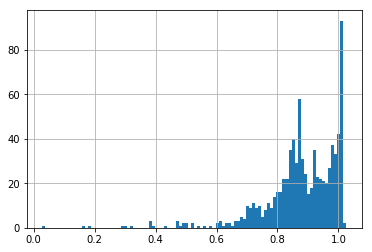

In [285]:
(date_count / span.dt.days).hist(bins=100)

In [298]:
open_ratio = (date_count/span.dt.days)
rh_store_id = open_ratio[((open_ratio > 0.8) & (open_ratio < 0.9) & (date_count >= 90))].index
rh_store_df = train[train.air_store_id.isin(rh_store_id)]

In [299]:
rh_store_df

(72477, 57)

In [300]:
g = rh_store_df.groupby(['air_store_id', 'dow']).visit_date.count().groupby('air_store_id')
has_regular_holiday = ((g.min() / g.max()) < 0.2)

In [301]:
air_store_id = train.air_store_id.unique()

In [302]:
complete_rh_store_ref = (rh_store_df.groupby(['air_store_id']).dow.nunique() != 7)
complete_rh_store_id = complete_rh_store_ref[complete_rh_store_ref].index

In [305]:
missing_dow_ref = missing_dow(complete_rh_store_id)
missing_dow_ref

air_store_id
air_2545dd3a00f265e2    3
air_2aab19554f91ff82    6
air_41bbf6e1d9814c4b    6
air_472b19e3b5bffa41    6
air_65e294f1ae6df9c3    6
air_68147db09287bf74    0
air_77dfc83450cbc89c    6
air_831658500aa7c846    6
air_88ca84051ba95339    6
air_9152d9926e5c4a3a    6
air_9483d65e9cc9a6b7    6
air_950381108f839348    6
air_990a642a3deb2903    6
air_9aa92007e3628dbc    2
air_a239a44805932bab    2
air_c52c63c781fe48f6    1
air_cc35590cd1da8554    6
air_d34c0861a2be94cb    6
air_e89735e80d614a7e    6
Name: dow, dtype: object

In [ ]:
missi

In [292]:
test['regular_holiday'] = False
for i, row in test.iterrows():
    if row['air_store_id'] in missing_dow_ref.index and row['dow']==missing_dow_ref[row['air_store_id']]:
        test.loc[i, 'regular_holiday'] = True

In [244]:
test.regular_holiday.sum()

101

In [252]:
test.regular_holiday.shape

(32019,)

In [205]:
def missing_dow(ind):
    dows = train.groupby('air_store_id').dow.unique()[ind]
    res = dows.copy()
    for i, dow in enumerate(dows):
        res[i] = int(list(set(range(7)) - set(dow))[0])
    return res

In [249]:
submit = pd.read_csv('sub_hm.csv')

In [261]:
submit.loc[test.regular_holiday, 'visitors'] = 0

In [263]:
submit.to_csv('sub_hm_rh.csv', index=False)

In [266]:
(submit.visitors == 0).sum()

101

In [169]:
len(rh_store_df)

89760

In [168]:
len(complete_rh_store_id)

291

In [162]:
complete_rh_store_id

air_store_id
air_0241aa3964b7f861    False
air_034a3d5b40d5b1b1    False
air_049f6d5b402a31b2    False
air_06f95ac5c33aca10    False
air_07bb665f9cdfbdfb    False
air_084d98859256acf0    False
air_08ef81d5b7a0d13f    False
air_09a845d5b5944b01    False
air_0a74a5408a0b8642    False
air_0b184ec04c741a6a    False
air_0b1e72d2d4422b20    False
air_138ee734ac79ff90    False
air_138ff410757b845f    False
air_1653a6c513865af3    False
air_16cf0a73233896de    False
air_1707a3f18bb0da07    False
air_1979eaff8189d086    False
air_1ab60ce33bfed8a8    False
air_1dea9815ccd36620    False
air_1eeff462acb24fb7    False
air_1f1390a8be2272b3    False
air_1f7f8fa557bc0d55    False
air_2009041dbf9264de    False
air_20619d21192aa571    False
air_2195cd5025a98033    False
air_228f10bec0bda9c8    False
air_24b9b2a020826ede    False
air_2545dd3a00f265e2     True
air_2570ccb93badde68    False
air_258dc112912fc458    False
                        ...  
air_e8ed9335d0c38333    False
air_e9ebf7fc520ac76a    Fal

In [151]:
regular_holiday_store.groupby('air_store_id').dow.nunique() < 7

air_store_id
air_0241aa3964b7f861    False
air_034a3d5b40d5b1b1    False
air_049f6d5b402a31b2    False
air_06f95ac5c33aca10    False
air_07bb665f9cdfbdfb    False
air_084d98859256acf0    False
air_08ef81d5b7a0d13f    False
air_09a845d5b5944b01    False
air_0a74a5408a0b8642    False
air_0b184ec04c741a6a    False
air_0b1e72d2d4422b20    False
air_138ee734ac79ff90    False
air_138ff410757b845f    False
air_1653a6c513865af3    False
air_16cf0a73233896de    False
air_1707a3f18bb0da07    False
air_1979eaff8189d086    False
air_1ab60ce33bfed8a8    False
air_1dea9815ccd36620    False
air_1eeff462acb24fb7    False
air_1f1390a8be2272b3    False
air_1f7f8fa557bc0d55    False
air_2009041dbf9264de    False
air_20619d21192aa571    False
air_2195cd5025a98033    False
air_228f10bec0bda9c8    False
air_24b9b2a020826ede    False
air_2545dd3a00f265e2     True
air_2570ccb93badde68    False
air_258dc112912fc458    False
                        ...  
air_e8ed9335d0c38333    False
air_e9ebf7fc520ac76a    Fal

In [147]:
regular_holiday_store.query('air_store_id in @complete_rh_stores').groupby('air_store_id').dow.unique()

air_store_id
air_034a3d5b40d5b1b1    [4, 5, 6, 0, 2, 3, 1]
air_06f95ac5c33aca10    [1, 2, 3, 4, 5, 6, 0]
air_2703dcb33192b181    [4, 5, 6, 1, 2, 3, 0]
air_2cee51fa6fdf6c0d    [1, 3, 4, 5, 6, 0, 2]
air_48ffd31594bc3263    [4, 5, 6, 0, 1, 2, 3]
air_57ed725a1930a5b9    [4, 5, 6, 0, 1, 2, 3]
air_5acc13d655a6e8b2    [4, 5, 6, 1, 2, 3, 0]
air_5e70fe82f9e4fab6    [0, 1, 2, 3, 4, 5, 6]
air_6873982b9e19c7ad    [4, 5, 6, 0, 1, 3, 2]
air_789466e488705c93    [5, 6, 0, 2, 3, 4, 1]
air_87467487d21891dd    [4, 5, 1, 2, 3, 6, 0]
air_95d28905941fd4cb    [0, 1, 2, 3, 4, 5, 6]
air_a373500730e2a9e0    [1, 2, 3, 4, 5, 6, 0]
air_a49f1cf0634f13e5    [4, 5, 0, 1, 2, 3, 6]
air_e0aee25b56a069f2    [4, 5, 6, 0, 1, 3, 2]
air_e89735e80d614a7e       [4, 5, 0, 1, 2, 3]
air_f0c7272956e62f12    [2, 3, 5, 6, 1, 4, 0]
air_f96765e800907c77    [0, 1, 2, 3, 4, 5, 6]
Name: dow, dtype: object

In [138]:
complete_regular_holiday_store

air_store_id
air_0241aa3964b7f861    False
air_034a3d5b40d5b1b1    False
air_049f6d5b402a31b2    False
air_06f95ac5c33aca10    False
air_07bb665f9cdfbdfb    False
air_084d98859256acf0    False
air_08ef81d5b7a0d13f    False
air_09a845d5b5944b01    False
air_0a74a5408a0b8642    False
air_0b184ec04c741a6a    False
air_0b1e72d2d4422b20    False
air_138ee734ac79ff90    False
air_138ff410757b845f    False
air_1653a6c513865af3    False
air_16cf0a73233896de    False
air_1707a3f18bb0da07    False
air_1979eaff8189d086    False
air_1ab60ce33bfed8a8    False
air_1dea9815ccd36620    False
air_1eeff462acb24fb7    False
air_1f1390a8be2272b3    False
air_1f7f8fa557bc0d55    False
air_2009041dbf9264de    False
air_20619d21192aa571    False
air_2195cd5025a98033    False
air_228f10bec0bda9c8    False
air_24b9b2a020826ede    False
air_2545dd3a00f265e2     True
air_2570ccb93badde68    False
air_258dc112912fc458    False
                        ...  
air_e8ed9335d0c38333    False
air_e9ebf7fc520ac76a    Fal